In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("labeled_data.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
dataset["labels"] = dataset["class"].map({0 : "hate speech",
                                         1 : "offensive language",
                                         2 : "No hate or offensive language"})

dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


In [7]:
data = dataset[['tweet','labels']]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [8]:
import re
import nltk
import string


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\scien\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [16]:
#import stemmer
Stemmer = nltk.SnowballStemmer("english")

In [20]:
#Data Clustering
def clean_data(text):
    text = str(text).lower()
    text = re.sub('http?://\s+[www.\.s+]', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*', '',text)
    text = [word for word in text.split(' ') if word not in stop_words]
    text = " ".join(text)
    text = [Stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\scien\AppData\Local\Temp\ipykernel_12204\3276376682.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('http?://\s+[www.\.s+]', '', text)
C:\Users\scien\AppData\Local\Temp\ipykernel_12204\3276376682.py:5: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\scien\AppData\Local\Temp\ipykernel_12204\3276376682.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '',text)


In [21]:
data["tweet"] = data["tweet"].apply(clean_data)
data

C:\Users\scien\AppData\Local\Temp\ipykernel_12204\1117457519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive language
3,rt cganderson vivabas look like tranni,offensive language
4,rt shenikarobert shit hear might true might f...,offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,offensive language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitch tellin lie,offensive language


In [22]:
X = np.array(data["tweet"])
y = np.array(data["labels"])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = cv.fit_transform(X)
X

<24783x26151 sparse matrix of type '<class 'numpy.int64'>'
	with 198287 stored elements in Compressed Sparse Row format>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [25]:
#Building ML Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [28]:
#Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1102,   34,  243],
       [  32,  147,  286],
       [ 234,  230, 5871]], dtype=int64)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

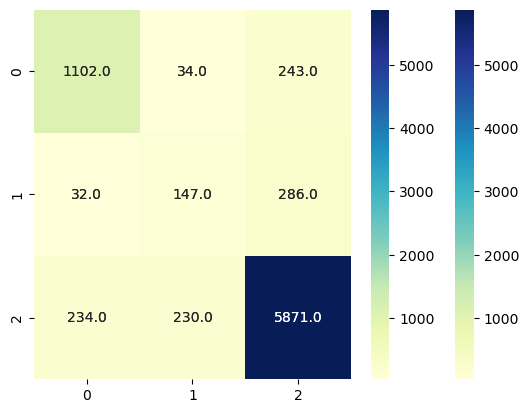

In [38]:
sns.heatmap (cm, annot = True, fmt = ".1f", cmap = "YlGnBu")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8705220687125566

In [37]:
Sample = "Let's unite and kill all the people who are protesting against goverenment"
Sample = clean_data(Sample)
Sample

'let unit kill peopl protest goveren'

In [35]:
data1 = cv.transform([Sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
dt.predict(data1)

array(['hate speech'], dtype=object)